# Python Developers Survey 2017

## Exploratory Data Analysis

Data source: [Python Developers Survey 2017](https://www.jetbrains.com/research/python-developers-survey-2017/)

This notebook demonstrates how the simple summary techniques we've learned in the [workshop](https://jenfly.github.io/pydata-intro-workshop/) can help you navigate and analyze a large CSV file. In this example, we will analyze responses to the survey questions "What do you use Python for?" and "What do you use Python for *the most*?"

- The DataFrame attributes `shape`, `dtypes` and `columns` will help us quickly find and extract the columns of interest from a CSV file with a whopping **162 columns**!

This example also demonstrates other handy techniques we learned in the workshop, such as:

- Applying string methods to parse information from text data
- Counting the unique values in a column with the `value_counts` method
- Using a filter Series to extract a subset of data
- Computing sums along rows and columns of a DataFrame

### Initial Setup

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display graphs inline
%matplotlib inline

# Use styles from the Seaborn library to make graphs look nicer
sns.set()

### Load Data

#### Read the CSV file into a DataFrame

In [2]:
survey = pd.read_csv('data/pythondevsurvey2017_raw_data.csv')
survey.head()

,Is Python the main language you use for your current projects?,None:What other language(s) do you use?,Java:What other language(s) do you use?,JavaScript:What other language(s) do you use?,C/C++:What other language(s) do you use?,PHP:What other language(s) do you use?,C#:What other language(s) do you use?,Ruby:What other language(s) do you use?,Bash / Shell:What other language(s) do you use?,Objective-C:What other language(s) do you use?,...,Technical support:Which of the following best describes your job role(s)?,Data analyst:Which of the following best describes your job role(s)?,Business analyst:Which of the following best describes your job role(s)?,Team lead:Which of the following best describes your job role(s)?,Product manager:Which of the following best describes your job role(s)?,CIO / CEO / CTO:Which of the following best describes your job role(s)?,Systems analyst:Which of the following best describes your job role(s)?,Other - Write In::Which of the following best describes your job role(s)?,Could you tell us your age range?,What country do you live in?
0,Yes,NaN,NaN,JavaScript,NaN,PHP,NaN,NaN,Bash / Shell,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60 or older,Italy
1,Yes,NaN,NaN,JavaScript,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Team lead,NaN,NaN,NaN,NaN,40-49,United Kingdom
2,Yes,NaN,NaN,JavaScript,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40-49,France
3,"No, I don’t use Python for my current projects",NaN,NaN,NaN,NaN,NaN,C#,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17 or younger,Spain
4,Yes,NaN,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18-20,Israel


#### How big is our DataFrame?

In [3]:
survey.shape

(9506, 162)

Yikes! The data has 9506 rows (i.e. 9506 total respondents to the survey) and 162 columns. Trying to make sense of such a huge number of columns in Excel would likely be an unwieldy and unpleasant task.

Let's save the number of respondents to a variable so we can use it later:

In [4]:
n_respondents = survey.shape[0]
n_respondents

9506

### Data Columns

Let's figure what the heck is in all these columns.  We can use the `dtypes` attribute to get the name and data type of each column. If we simply display `survey.dtypes` in the cell below, it will only show the first 30 rows and last 30 rows, with `...` in between. 
- We could tinker with some settings by running the code `pd.set_option('display.max_rows', 1000)` or using other solutions described [here](https://stackoverflow.com/questions/19124601/is-there-a-way-to-pretty-print-the-entire-pandas-series-dataframe), or we could use a `for` loop to print the items in `dtypes` in a slightly more compact way. I'll use the latter approach. 
- I'm also using [f-strings](https://realpython.com/python-f-strings/), a really neat feature of Python 3 (version 3.6 and later) as a shortcut to construct a string containing the values of variables.

In [5]:
# Iterate over the items in survey.dtypes
for column, dtype in survey.dtypes.items():
    # Print the data type and the column name, separated by a tab (\t)
    # -- The syntax below is equivalent to: print(str(dtype) + '\t' + column)
    print(f'{dtype} \t {column}')

object 	 Is Python the main language you use for your current projects?
object 	 None:What other language(s) do you use?
object 	 Java:What other language(s) do you use?
object 	 JavaScript:What other language(s) do you use?
object 	 C/C++:What other language(s) do you use?
object 	 PHP:What other language(s) do you use?
object 	 C#:What other language(s) do you use?
object 	 Ruby:What other language(s) do you use?
object 	 Bash / Shell:What other language(s) do you use?
object 	 Objective-C:What other language(s) do you use?
object 	 Go:What other language(s) do you use?
object 	 Visual Basic:What other language(s) do you use?
object 	 Scala:What other language(s) do you use?
object 	 SQL:What other language(s) do you use?
object 	 Kotlin:What other language(s) do you use?
object 	 R:What other language(s) do you use?
object 	 Swift:What other language(s) do you use?
object 	 Clojure:What other language(s) do you use?
object 	 Perl:What other language(s) do you use?
object 	 Rust:What

Skimming through the column names, we can see there are a bunch of them ending with the string `'What do you use Python for?'`, for example:
- `'Educational purposes: What do you use Python for?'`
- `'Data analysis: What do you use Python for?'`
- etc.

These represent different multiple choice answers to the survey question "What do you use Python for?", where respondents were able to select more than one answer to the question. This kind of structure is quite common in the raw data you get from various online survey apps.

After these columns, the next column name is: `'What do you use Python for the most?'`. We'll analyze the data in this column too.

### Answers to the question: "What do you use Python for?"

#### (multiple choice survey question)

We want to extract the subset of data containing answers to this question. To do this, we need to find all the columns whose name contains the phrase 'What do you use Python for?'
- First we create a filter Series using the string method `endswith` on the column names in `survey.columns`

In [6]:
usage_filter = survey.columns.str.endswith('What do you use Python for?')
usage_filter

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

- Next, we use the filter to find the names of the relevant columns:

In [7]:
cols_usage = survey.columns[usage_filter]
cols_usage

Index(['Educational purposes: What do you use Python for?',
       'Data analysis: What do you use Python for?',
       'DevOps / System administration / Writing automation scripts: What do you use Python for?',
       'Software testing / Writing automated tests: What do you use Python for?',
       'Software prototyping: What do you use Python for?',
       'Web development: What do you use Python for?',
       'Machine learning: What do you use Python for?',
       'Mobile development: What do you use Python for?',
       'Desktop development: What do you use Python for?',
       'Computer graphics: What do you use Python for?',
       'Network programming: What do you use Python for?',
       'Game development: What do you use Python for?',
       'Multimedia applications development: What do you use Python for?',
       'Embedded development: What do you use Python for?',
       'Programming of web parsers / scrapers / crawlers: What do you use Python for?',
       'Other - Write I

What values are in each of these columns?

In [8]:
for col in cols_usage:
    print(survey[col].value_counts(dropna=False))
    print('\n')

NaN                     7227
Educational purposes    2279
Name: Educational purposes: What do you use Python for?, dtype: int64


NaN              5449
Data analysis    4057
Name: Data analysis: What do you use Python for?, dtype: int64


NaN                                                            6679
DevOps / System administration / Writing automation scripts    2827
Name: DevOps / System administration / Writing automation scripts: What do you use Python for?, dtype: int64


NaN                                           7365
Software testing / Writing automated tests    2141
Name: Software testing / Writing automated tests: What do you use Python for?, dtype: int64


NaN                     7727
Software prototyping    1779
Name: Software prototyping: What do you use Python for?, dtype: int64


NaN                5515
Web development    3991
Name: Web development: What do you use Python for?, dtype: int64


NaN                 6964
Machine learning    2542
Name: Machine learning:

The output above shows that the values in these columns are such that they can be stacked together into one giant Series, and then we can simply count the values in that Series using the `value_counts` method:

In [9]:
# Stack the columns into a giant Series
usages = survey[cols_usage].stack()

# Total number of answers to this survey question
n_answers = len(usages)
print(f'We have {n_answers} answers to this question, from the {n_respondents} respondents')

# Display the first 20 items in the Series 
# (converting to a list first so that the output displays more nicely)
print('The first 20 answers are:')
list(usages.head(20))

We have 28864 answers to this question, from the 9506 respondents
The first 20 answers are:


['Educational purposes',
 'Data analysis',
 'DevOps / System administration / Writing automation scripts',
 'Programming of web parsers / scrapers / crawlers',
 'Data analysis',
 'DevOps / System administration / Writing automation scripts',
 'Web development',
 'Network programming',
 'Programming of web parsers / scrapers / crawlers',
 'DevOps / System administration / Writing automation scripts',
 'Web development',
 'Data analysis',
 'Software prototyping',
 'Machine learning',
 'Desktop development',
 'Educational purposes',
 'Data analysis',
 'Web development',
 'Mobile development',
 'Network programming']

In [10]:
# Get the counts for each value
usage_counts = usages.value_counts()
usage_counts

Data analysis                                                  4057
Web development                                                3991
DevOps / System administration / Writing automation scripts    2827
Programming of web parsers / scrapers / crawlers               2582
Machine learning                                               2542
Educational purposes                                           2279
Software testing / Writing automated tests                     2141
Software prototyping                                           1779
Network programming                                            1692
Desktop development                                            1599
Computer graphics                                               838
Game development                                                697
Embedded development                                            576
Other - Write In:                                               545
Mobile development                              

Let's calculate these totals as a fraction of the total number of respondents who answered the question "What do you use Python for?". This is a bit complicated, because the information is spread over multiple columns and we need to exclude rows where the respondent didn't answer the question at all.

First, we calculate how many answers each respondent gave to this survey question:

In [11]:
# Use the `notnull` method and sum across columns to calculate
# how many answers each respondent provided for this question
num_answers = survey[cols_usage].notnull().sum(axis=1)
num_answers.head(10)

0    4
1    5
2    2
3    0
4    4
5    7
6    7
7    0
8    7
9    4
dtype: int64

In [12]:
len(num_answers)

9506

Each value in the Series `num_answers` correspondents to one respondent (9506 respondents in total). A value of 0 means the respondent didn't answer this survey question. Any value greater than 0 means that the respondent provided one or more answers to the question.

In [13]:
num_answers.value_counts()

3     1660
2     1651
0     1394
4     1311
1     1303
5      847
6      565
7      356
8      191
9       96
10      49
12      28
11      27
15      13
13       8
14       4
16       3
dtype: int64

We can see that respondents provided up to 16 answers to the question, and the most common number of answers was 3.

Next, create a filter identifying whether or not a respondent answered the question:

In [14]:
# Create a filter to identify which respondents had more than 0 answers to this question
answered_ques = num_answers > 0
answered_ques.head()

0     True
1     True
2     True
3    False
4     True
dtype: bool

To find the number of respondents who answered the question, we sum the values in the `answered_ques` Series:

In [15]:
n_ques_respondents = answered_ques.sum()
n_ques_respondents

8112

Finally, we can compute the totals for each Python usage as a fraction of the number of respondents who answered the survey question:

In [16]:
usage_frac = usage_counts / n_ques_respondents
usage_frac

Data analysis                                                  0.500123
Web development                                                0.491987
DevOps / System administration / Writing automation scripts    0.348496
Programming of web parsers / scrapers / crawlers               0.318294
Machine learning                                               0.313363
Educational purposes                                           0.280942
Software testing / Writing automated tests                     0.263930
Software prototyping                                           0.219305
Network programming                                            0.208580
Desktop development                                            0.197115
Computer graphics                                              0.103304
Game development                                               0.085922
Embedded development                                           0.071006
Other - Write In:                                              0

### Visualizing the Results

Let's plot the results as a horizontal bar chart. First we'll define a function to create our plot, so that we can re-use it for other plots.

In [17]:
def plot_barh(series, title=None, figsize=(7, 7)):
    """Plot a horizontal bar chart with tick labels in percent format"""
       
    # Sort the series in ascending order, so that in the horizontal bar chart,
    # the largest values are on top and smallest at the bottom
    series_sorted = series.sort_values(ascending=True)
    
    # We will use dark blue from the Seaborn default colour palette
    blue = sns.color_palette()[0]
    
    # Create a horizontal bar chart and customize the labels and formatting
    ax = series_sorted.plot(kind='barh', color=blue, figsize=figsize)
    ax.set_xticklabels([f'{val:.0%}' for val in ax.get_xticks()])
    ax.tick_params(labelsize='large')
    if title is not None:
        ax.set_title(title, fontsize='large', fontweight='bold');

#### Create the bar chart

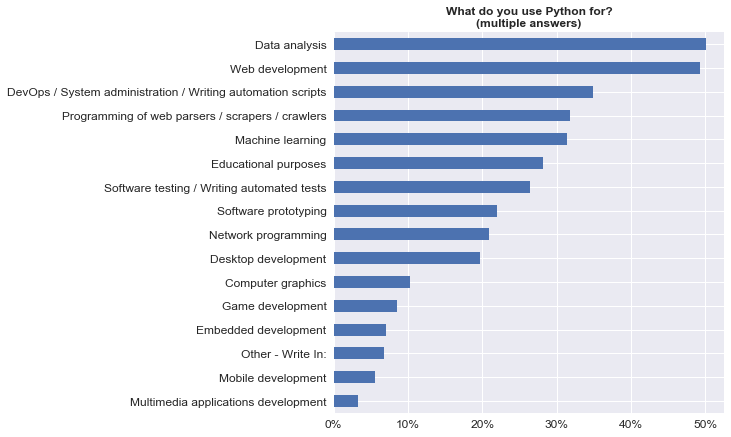

In [18]:
plot_barh(usage_frac, title='What do you use Python for?\n(multiple answers)')

### Answers to the question: "What do you use Python for *the most*?"

#### (single choice survey question)

This data is easier to analyze because all the answers to the question are in a single column. All we need to do is extract the column and use the `value_counts` method to tally up the answers. For convenience, we can also use the keyword argument `normalize=True` to compute the totals directly as a fraction of the number of respondents. *(This approach wouldn't have worked in the previous section because the data was spread over multiple columns and there were multiple choices per respondent.)*

In [19]:
column = 'What do you use Python for the most?'
primary_usage_frac = survey[column].value_counts(normalize=True)
primary_usage_frac

Web development                                                0.260355
Data analysis                                                  0.176282
Educational purposes                                           0.094058
DevOps / System administration / Writing automation scripts    0.092949
Machine learning                                               0.085799
Desktop development                                            0.056460
Programming of web parsers / scrapers / crawlers               0.036982
Other - Write In:                                              0.035010
Software testing / Writing automated tests                     0.033900
Network programming                                            0.033037
Software prototyping                                           0.029709
Game development                                               0.023545
Computer graphics                                              0.017628
Embedded development                                           0

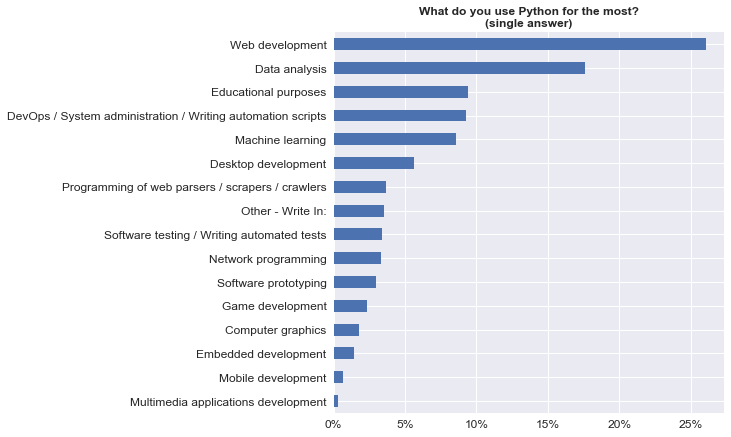

In [20]:
plot_barh(primary_usage_frac, title='What do you use Python for the most?\n(single answer)')

## Conclusions

Web development and data analysis are clear frontrunners as the most popular types of Python development.
- While **26% of developers indicated web development as their primary usage for Python**, 18% chose data analysis and 9% chose machine learning (a field of data science).
  - Consolidating data analysis and machine learning together as a "data science" category reveals that **27% of developers use Python primarily for data science**.
- Many developers use Python for more than one type of development. 50% of all respondents indicated that they use Python for data analysis, and 49% of all respondents use Python for web development.

We can compare our results with: https://www.jetbrains.com/research/python-developers-survey-2017/#types-of-development. 
- Perfect match&mdash;hurray!